# Census Income

: Load the Dataset

In [1]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv"
dataset = pd.read_csv(url)

# Display the first few rows of the dataset
print(dataset.head())


   Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50

 Explore the Dataset (EDA)

In [4]:
# Display basic information about the dataset
print("Dataset Info:")
print(dataset.info())

# Display summary statistics of the dataset
print("\nDataset Description:")
print(dataset.describe())

# Display the shape of the dataset
print("\nDataset Shape:")
print(dataset.shape)

# Display column names to check for any typos or extra spaces
print("Column Names:", dataset.columns)

# Remove leading/trailing spaces in column names
dataset.columns = dataset.columns.str.strip()

# Display the distribution of the target variable
print("\nTarget Variable Distribution:")
print(dataset['Income'].value_counts())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Dataset Description:
                Age        Fnlwgt  Education_num  Ca

Visualization

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

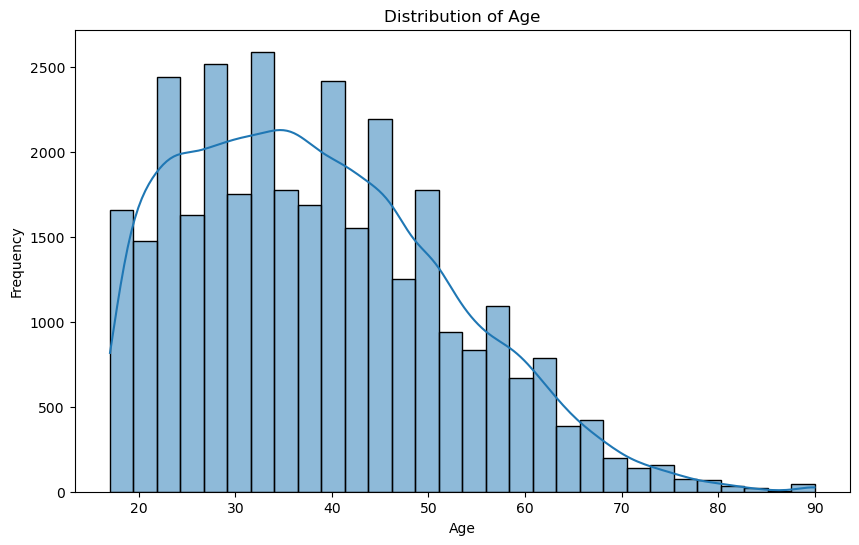

In [6]:
# Plot the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


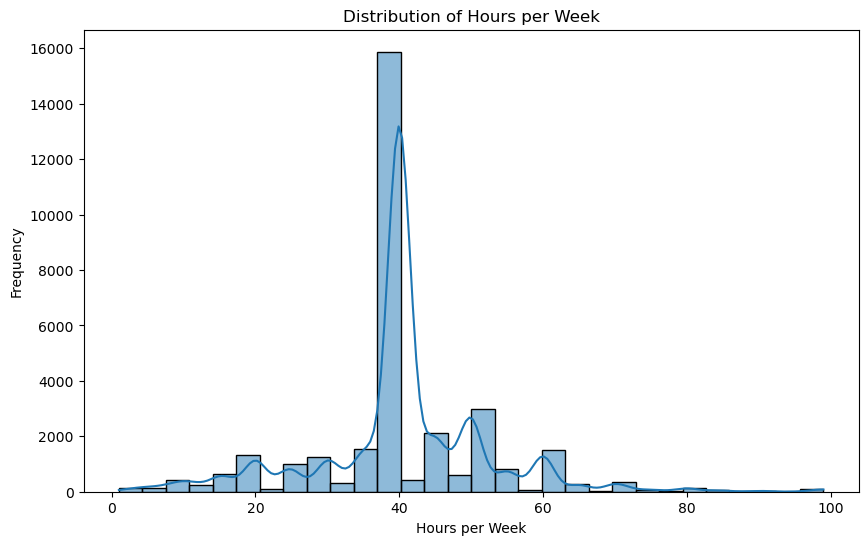

In [7]:
# Plot the distribution of Hours per Week
plt.figure(figsize=(10, 6))
sns.histplot(dataset['Hours_per_week'], bins=30, kde=True)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


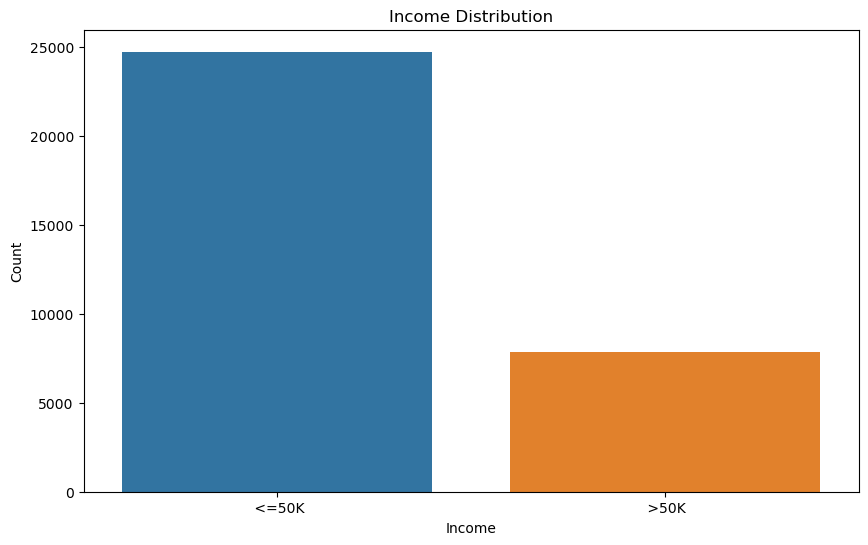

In [8]:
# Plot the distribution of Income
plt.figure(figsize=(10, 6))
sns.countplot(x='Income', data=dataset)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_10144\550118442.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')


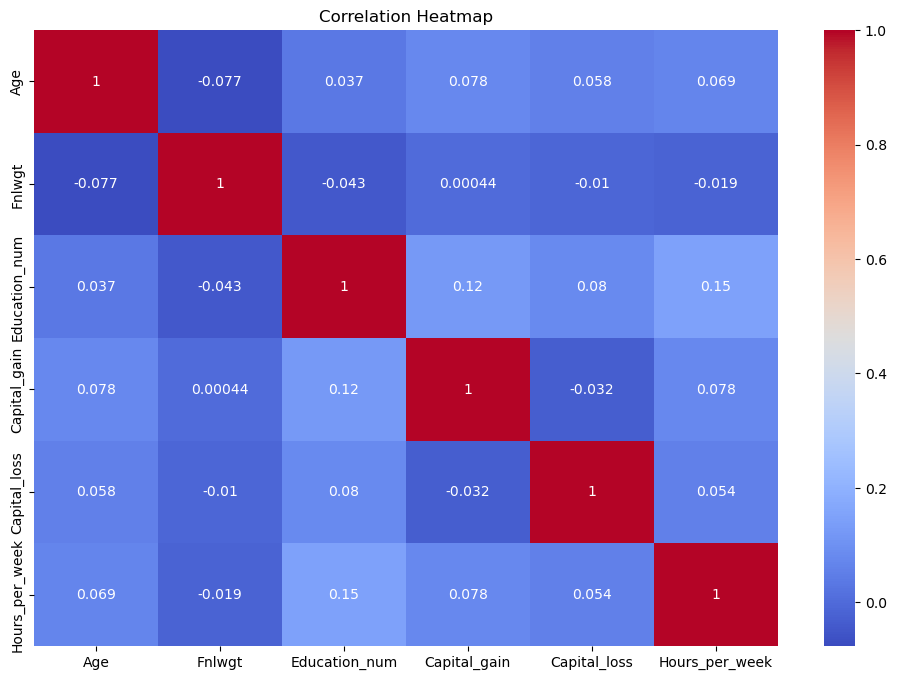

In [9]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

 Data Cleaning and Preprocessing

In [10]:
# Check for missing values
print("Missing Values:\n", dataset.isnull().sum())

# Drop rows with missing values (if any)
dataset = dataset.dropna()

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']

# Apply LabelEncoder to each categorical column
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])

# Encode the target variable
dataset['Income'] = label_encoder.fit_transform(dataset['Income'])

# Display the first few rows of the cleaned dataset
print("Cleaned Dataset:\n", dataset.head())


Missing Values:
 Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64
Cleaned Dataset:
    Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          6   83311          9             13               2   
1   38          4  215646         11              9               0   
2   53          4  234721          1              7               2   
3   28          4  338409          9             13               2   
4   37          4  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           4             0     4    1             0             0   
1           6             1     4    1             0             0   
2           6  

Feature Selection

In [11]:
# Define the features (X) and the target variable (y)
X = dataset.drop('Income', axis=1)
y = dataset['Income']

# Display the shapes of X and y
print("Features Shape:", X.shape)
print("Target Shape:", y.shape)


Features Shape: (32560, 14)
Target Shape: (32560,)


Split the Dataset

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (26048, 14)
Testing Features Shape: (6512, 14)
Training Target Shape: (26048,)
Testing Target Shape: (6512,)


Train a Model

In [13]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Evaluate the Model

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4912
           1       0.61      0.63      0.62      1600

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.74      6512
weighted avg       0.81      0.81      0.81      6512

Confusion Matrix:
 [[4259  653]
 [ 599 1001]]


Model Improvement

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:\n", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Tuned Accuracy: {accuracy_best:.2f}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters:
 {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Accuracy: 0.85


Conclusion: